In [32]:
# Import packages
import pandas as pd
import fiona
import geopandas as gpd
import pysal as ps
import sklearn
import sys,os
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline
import numpy as np
from shapely.geometry import Polygon
print("Importing packages..")

Importing packages..


In [34]:
ride_data = "/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/"
official_counts = "/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/MAG_Official_Counts/MAG2015_16/"
mag2016_edges_strava = gpd.read_file(ride_data+"Edges/maricopa_osm_edges.shp")
mag2016_nodes_strava = gpd.read_file(ride_data+"Nodes/maricopa_osm_edges_nodes.shp")
mag2016_od_poly_strava = gpd.read_file(ride_data+"OD/maricopa_edges_od_polygons.shp")
print("No. of Streets in Maricopa County = " + str(mag2016_edges_strava.shape[0]))
print("No. of intersections in Maricopa County = " + str(mag2016_nodes_strava.shape[0]))
print("No. of unique bicycle routes in Maricopa County = " + str(mag2016_od_poly_strava.shape[0]))

No. of Streets in Maricopa County = 498930
No. of intersections in Maricopa County = 372466
No. of unique bicycle routes in Maricopa County = 2343


In [49]:
riders_strava = pd.read_csv(ride_data+"Edges/maricopa_osm_edges_metro_edges_data.csv")
print(riders_strava.shape[0])
riders_strava.head()

68469637


,edge_id,year,day,hour,minute,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_activity_count,activity_time,rev_activity_time,commute_count
0,482824,2016,59,13,48,1,0,1,0,1,34.910414,NaN,0
1,482824,2016,162,8,21,1,0,1,0,1,28.604735,NaN,0
2,482824,2016,164,20,29,1,0,1,0,1,27.123808,NaN,0
3,482824,2016,183,1,55,0,1,0,1,1,NaN,35.306414,0
4,471399,2016,2,12,8,0,1,0,1,1,NaN,130.723775,0


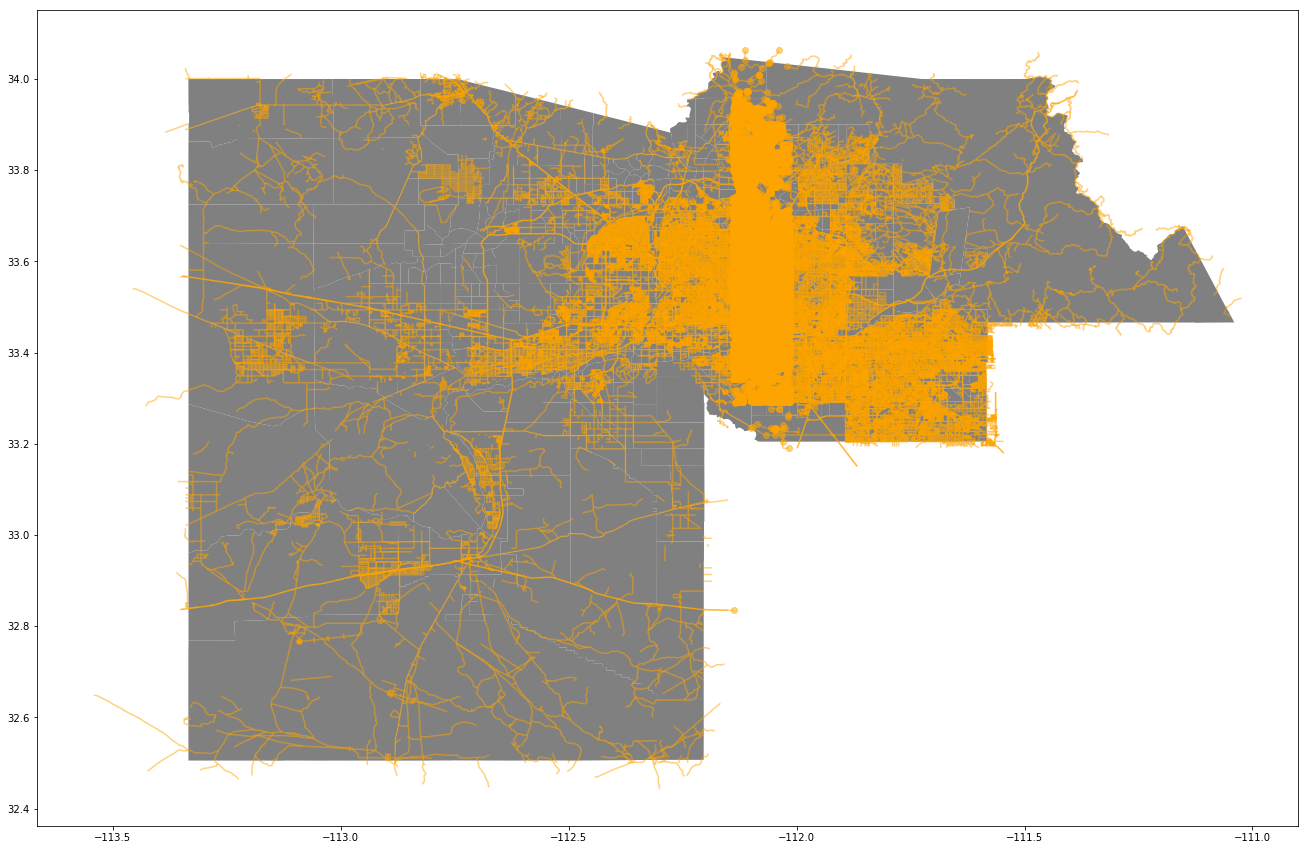

In [3]:
ax = mag2016_od_poly_strava.plot(color='grey', figsize = ([25,15]))
mag2016_edges_strava.plot(ax=ax, color='orange', alpha=0.5, figsize = ([25,15]))
mag2016_nodes_strava[120000:200000].plot(ax=ax, color='orange', alpha=0.5, figsize = ([25,15]))

In [35]:
#Read files for Tempe
tempe_edges_strava = gpd.read_file("Tempe shapefiles/Tempe_edges_zipcodes.shp")
tempe_nodes_strava = gpd.read_file("Tempe shapefiles/Tempe_nodes_zipcodes.shp")
tempe_od_strava = gpd.read_file("Tempe shapefiles/Tempe_OD_zipcodes.shp")
tempe_zipcodes = gpd.read_file("Tempe shapefiles/Tempe_zipcodes.shp")
print("No. of streets in Tempe = " + str(tempe_edges_strava.shape[0])
      + "\nNo. of intersections in Tempe = " + str(tempe_nodes_strava.shape[0])
      + "\nNo. of OD polygons in Tempe = " + str(tempe_od_strava.shape[0]))

No. of streets in Tempe = 26045
No. of intersections in Tempe = 18945
No. of OD polygons in Tempe = 122


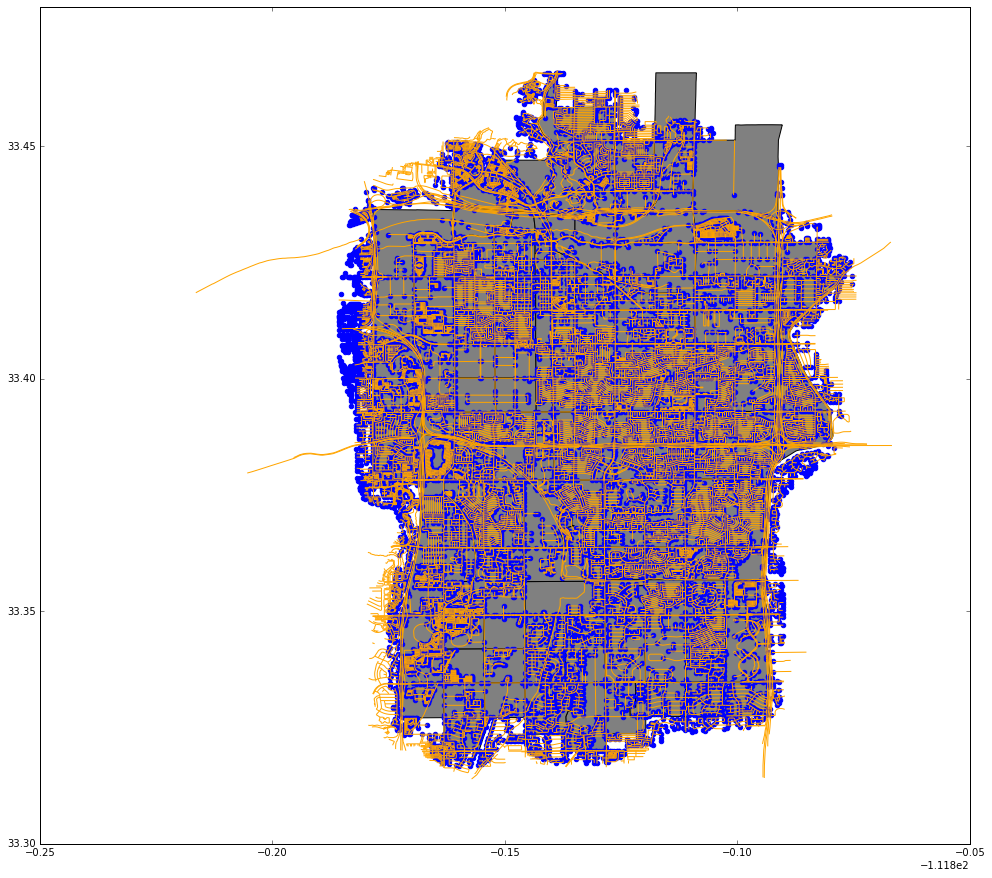

In [43]:
ax = tempe_od_strava.plot(color='grey', figsize = ([25,15]))
fig1 = tempe_edges_strava.plot(ax=ax, color='orange', figsize = ([25,15]))
fig2 = tempe_nodes_strava.plot(ax=ax, color='blue', figsize = ([25,15]))
plt.show(fig2)
#mag2015_16_official.plot(ax=ax, color = "green", figsize = ([25,15]))

In [47]:
import mplleaflet
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(lons, lats, alpha=0) #invisible data points, just to scale the map

mplleaflet.display(fig=fig)

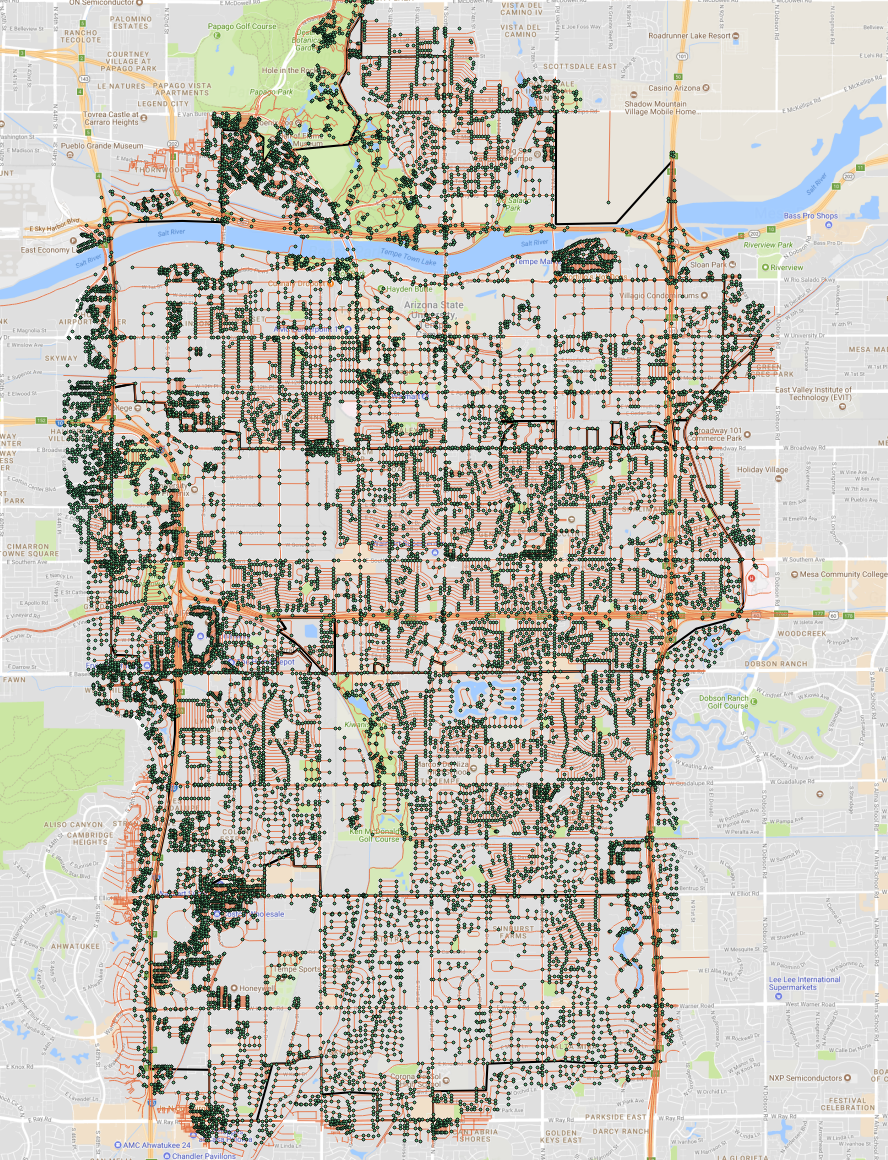

In [6]:
from IPython.display import Image
Image(filename='Figures/Tempe_zipcodes_street_gmaps.png') 

In [18]:
#Plot the Strava riders along streets by Month
path = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/"
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df_months = {}
df_months_merged = {}
def merge_monthly_total(df):
    x = df.merge(tempe_edges_strava, left_on ='edge_id', right_on = 'ID')
    return x
for i in range(0,12):
    df = months[i]+"_total_strava"
    filename = path + "maricopa_2016_ride_rollup_month_2016_"+str(i+1)+"_total.csv"
    x = pd.read_csv(filename)
    df_months[df] = x
    df1 = months[i]+"_total_strava_merged"
    merged = x.merge(tempe_edges_strava, left_on ='edge_id', right_on = 'ID')
    df_months_merged[df1] = merged
    merged.to_csv(ride_data + "Analysis_Generated_Data/"+df1+".csv")
    print(filename)

/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_1_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_2_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_3_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_4_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_5_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_6_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_7_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/ma

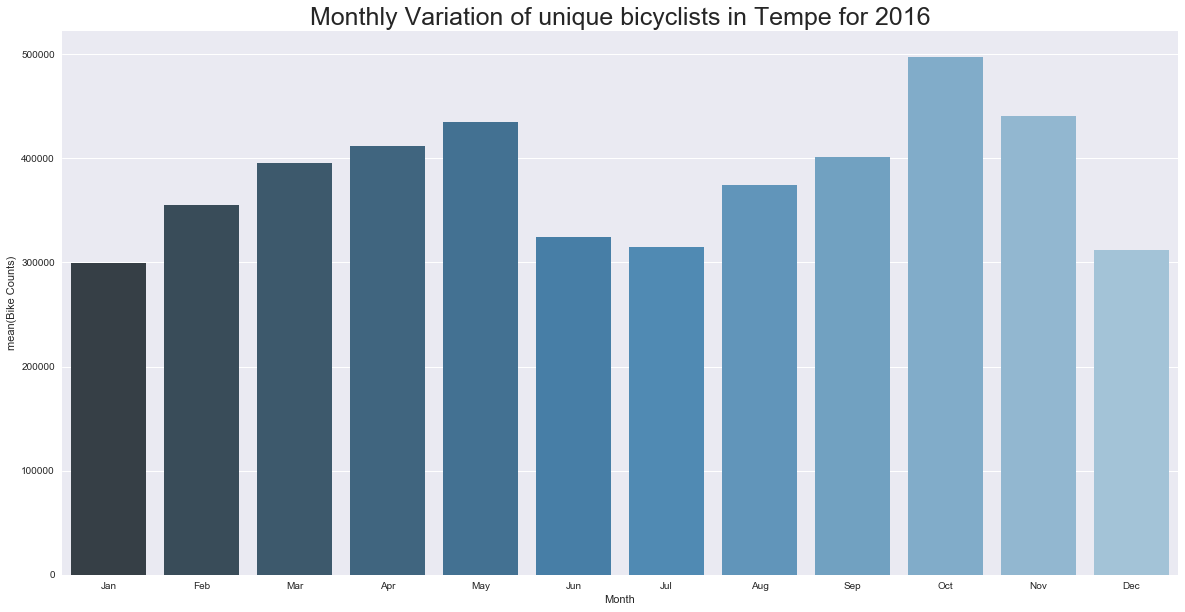

In [19]:
jan = df_months_merged["jan_total_strava_merged"][["actcnt"]].dropna().sum()
feb = df_months_merged["feb_total_strava_merged"][["actcnt"]].dropna().sum()
mar = df_months_merged["mar_total_strava_merged"][["actcnt"]].dropna().sum()
apr = df_months_merged["apr_total_strava_merged"][["actcnt"]].dropna().sum()
may = df_months_merged["may_total_strava_merged"][["actcnt"]].dropna().sum()
jun = df_months_merged["jun_total_strava_merged"][["actcnt"]].dropna().sum()
jul = df_months_merged["jul_total_strava_merged"][["actcnt"]].dropna().sum()
aug = df_months_merged["aug_total_strava_merged"][["actcnt"]].dropna().sum()
sep = df_months_merged["sep_total_strava_merged"][["actcnt"]].dropna().sum()
oct1 = df_months_merged["oct_total_strava_merged"][["actcnt"]].dropna().sum()
nov = df_months_merged["nov_total_strava_merged"][["actcnt"]].dropna().sum()
dec = df_months_merged["dec_total_strava_merged"][["actcnt"]].dropna().sum()
month = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
values = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct1,nov,dec]
plotdf = pd.DataFrame({'Month' : month,
                       'Bike Counts': values})
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
sns.set(sns.set_context("paper", rc={"font.size":8,"axes.titlesize":25,"axes.labelsize":20,"xtick.labelsize":15,"ytick.labelsize":15}))
#sns.set_context("paper")
sns.barplot(x="Month", y="Bike Counts", data = plotdf, palette="Blues_d").set_title("Monthly Variation of unique bicyclists in Tempe for 2016")
#sns.regplot(x=np.range(1,13), y="Bike Counts", data = plotdf)
plt.show()

In [4]:
# Plot histogram for bike counts in April/May and Oct/Nov
ride_data = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/"
apr_min_by_min = pd.read_csv(ride_data + "Analysis_Generated_Data/apr_tempe_min_by_min.csv")
apr_daily_count = apr_min_by_min[["edge_id","day","athlete_count"]].groupby(["edge_id","day"]).count()

/Users/avipsaroy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#df = apr_min_by_min[["edge_id","day","athlete_count"]].query("day>=91 & day<121").groupby(["edge_id","day"]).sum()
df.query("athlete_count>10").plot(x = "edge_id",y="athlete_count",)

,athlete_count
count,6309.000000
mean,16.644476
std,6.009024
min,11.000000
25%,12.000000
50%,15.000000
75%,19.000000
max,57.000000


In [ ]:
apr_daily_count.describe()

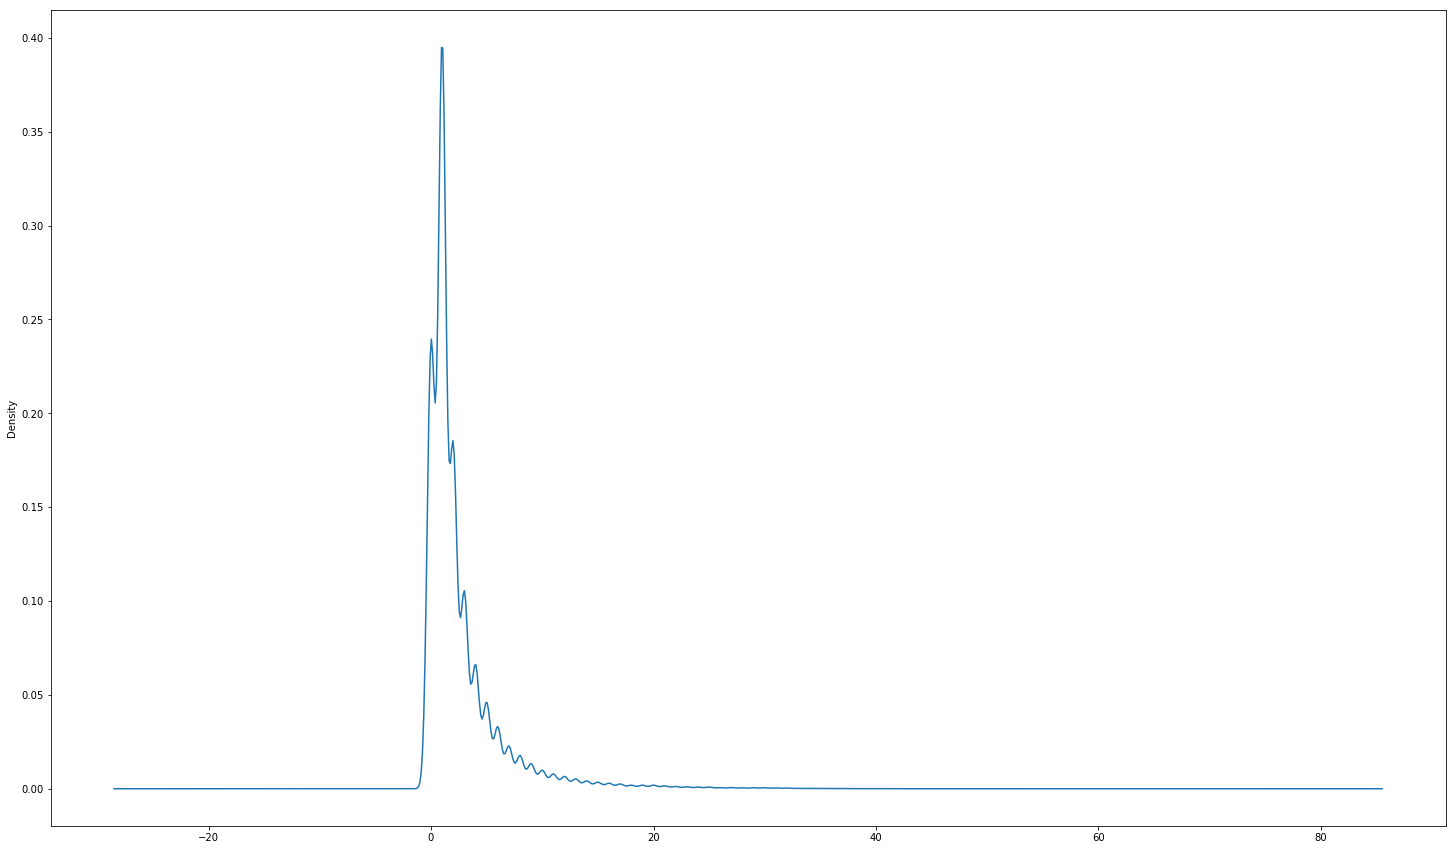

In [14]:
df.loc[df["athlete_count"]>0].plot(kind = "density", figsize = ([25,15]))

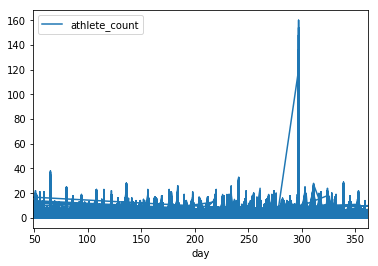

In [42]:
#apr_min_by_min_athlete_cnt = apr_min_by_min[["edge_id","year","day","hour","minute","athlete_count"]].dropna()
apr_min_by_min_athlete_cnt.plot(x="day",y="athlete_count") 

In [3]:
# Find street intersections between MAG locations and Strava segments
mag = gpd.read_file("C:/Users/aroy29/Dropbox (ASU)/Phoenix Bike Study/Data/MAG Bike Counts/Bike Count Shapefiles/Bike Count Shapefiles/Bike_Counts_2015_16.shp")
strava_edges = gpd.read_file("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_osm_edges.shp")
mag = mag.to_crs(strava_edges.crs)
mag_buffered = mag.buffer(distance=250)

In [13]:
mag_buffered = mag.buffer(distance=250)
mag_with_strava_edges = gpd.sjoin(mag.buffer(distance=250), strava_edges, how="left", op='intersects')

AttributeError: 'GeoSeries' object has no attribute 'columns'

In [15]:
mag['geometry'] = mag.geometry.buffer(100)

In [31]:
mag_intersects_strava = gpd.sjoin(strava_edges,mag,how="left",op="within")

In [30]:
mag_intersects_strava.shape

(21952920, 41)